# Mapping Accidents in NYC - Data Bootcamp Project 2018
![alt text](http://www.learnersonline.com/wp-content/uploads/2014/01/trafficjam6.jpg)

#### Ian Glennon | May 2018

## Contents

1. Overview
2. Data Source
    * 2.1. Data and Module Import
    * 2.2. Data Information
    * 2.3. Data Cleaning
3. Visualizing The Data
    * 3.1. Where Accidents Occur
    * 3.2. When Accidents Occur
    * 3.3. Why Accidents Occur

## 1. Overview

What impacts accidents? In particular, what are the major driver-related reasons for accidents, when do they occur, and where do they occur?

Better understanding the factors that lead to accidents can help officials in two main ways. First, this can aid in the allocation of resources. This relates to both city planning - i.e. where to locate hospitals and police stations - as well as city operations - i.e. where and when to place ambulance and police teams on standby.

This project looks to leverage NYPD Motor Vehicle Collision data located on [NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data). It parses collision data for the period of March 21, 2017 to March 21,2018 from the five Boroughs of NYC.



 ## 2. Data Source
 ### 2.1 Data and Module Import
 
 NYC Open Data is a project aimed at making NYC government data freely available. It is founded thanks to a partnership between The Mayor’s Office of Data Analytics (MODA),the Department of Information Technology and Telecommunications (DoITT), and Socrata. While vast amount of data are available on this site, I chose to look at NYPD Motor Vehicle Collision data.
 
 The data was obtained through a json query via https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data

In [2]:
#Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt     # graphics package
import matplotlib as mpl            # graphics package
import numpy as np
import datetime 

#Fetching Data from NYC Open Data
url = 'https://data.cityofnewyork.us/resource/qiz3-axqb.json?$limit=500000'
accidents = pd.read_json(url) 

accidents.dtypes

borough                                  object
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4            object
contributing_factor_vehicle_5            object
cross_street_name                        object
date                             datetime64[ns]
latitude                                float64
location                                 object
longitude                               float64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_persons_injured                 int64
number_of_persons_killed                  int64
off_street_name                          object
on_street_name                          

### 2.2 Data Information
We can see here that there this is a lot of information here. The important data for the analysis are borough, date and time information, number of people killed and injured, and accident reason. We are also only interested in accidents across one full year, so as not to have overlap in analysis.

In [6]:
accidents.dtypes

Borough                          object
Contributing_Factor_1            object
Contributing_Factor_2            object
Date                     datetime64[ns]
Cyclists Injured                  int64
Cyclists Killed                   int64
Motorists Injured                 int64
Motorists Killed                  int64
Pedestrians Injured               int64
Pedestrians Killed                int64
Time                     datetime64[ns]
Vehicle Type 1                   object
Vehicle Type 2                   object
Total Injured                     int64
Total Killed                      int64
Month                             int64
Hour                              int64
dtype: object

### 2.3 Data Cleaning
Below I drop the uneeded columns. I also rename the columns we will be using to make them easy to work with. I also filter out any data that doesn't fall within March 21, 2017 and March 21, 2018.

In [4]:
#Understanding data columns. Dropping unneeded columns and renaming
accidents.dtypes
accidents.drop(accidents.columns[[3,4,5,6,8,9,10,17,18,19,20,22,25,26,27,28]], axis=1, inplace=True)

# rename columns
accidents.columns = ['Borough', 'Contributing_Factor_1', 'Contributing_Factor_2','Date','Cyclists Injured','Cyclists Killed','Motorists Injured','Motorists Killed','Pedestrians Injured','Pedestrians Killed','Time','Vehicle Type 1','Vehicle Type 2']

#Get one year's worth of data
accidents[(accidents['Date']>datetime.date(2017,3,21)) & (accidents['Date']<datetime.date(2018,3,21))]  

,Borough,Contributing_Factor_1,Contributing_Factor_2,Date,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Pedestrians Injured,Pedestrians Killed,Time,Vehicle Type 1,Vehicle Type 2
330,NaN,Unsafe Lane Changing,Unspecified,2017-05-04,0,0,0,0,0,0,16:30,PASSENGER VEHICLE,PASSENGER VEHICLE
441,MANHATTAN,NaN,NaN,2017-05-22,0,0,0,0,0,0,20:50,TAXI,NaN
576,NaN,Following Too Closely,Unspecified,2017-04-03,0,0,2,0,0,0,6:05,NaN,NaN
661,NaN,Unspecified,Unspecified,2017-04-03,0,0,0,0,0,0,16:50,PASSENGER VEHICLE,PASSENGER VEHICLE
880,NaN,Unsafe Lane Changing,Unspecified,2017-04-04,0,0,0,0,0,0,12:20,PASSENGER VEHICLE,NaN
1072,NaN,Unspecified,Unspecified,2017-04-08,0,0,0,0,0,0,3:00,PASSENGER VEHICLE,PASSENGER VEHICLE
1209,NaN,Unspecified,NaN,2017-04-17,0,0,1,0,0,0,18:15,NaN,NaN
1263,NaN,Unsafe Speed,NaN,2017-05-25,0,0,0,0,0,0,5:52,SPORT UTILITY / STATION WAGON,NaN
1291,NaN,Driver Inexperience,Following Too Closely,2017-06-25,0,0,0,0,0,0,21:00,PASSENGER VEHICLE,PASSENGER VEHICLE
1683,NaN,Turning Improperly,Unspecified,2017-03-22,0,0,0,0,0,0,5:25,PASSENGER VEHICLE,NaN


Here I extract valuable Month and Hour information from the Date and Time columns, respectively. I also opt to add a column for "Total Killed" and "Total Injured". There seems to already be a column for this, but I prefer to do this sumation within Python.

In [5]:
#obtaining total injured, total killed, and month + hour of accident
accidents['Total Injured'] = accidents['Cyclists Injured'] + accidents['Motorists Injured'] + accidents['Pedestrians Injured']
accidents['Total Killed'] = accidents['Cyclists Killed'] + accidents['Motorists Killed'] + accidents['Pedestrians Killed']
accidents['Month'] = pd.DatetimeIndex(accidents['Date']).month
accidents["Time"] = pd.to_datetime(accidents["Time"])
accidents["Hour"] = accidents["Time"].dt.hour

print(accidents)

          Borough           Contributing_Factor_1  \
0        BROOKLYN                     Unspecified   
1             NaN               Oversized Vehicle   
2             NaN                     Fell Asleep   
3             NaN                    Unsafe Speed   
4        BROOKLYN                     Unspecified   
5             NaN                 Other Vehicular   
6          QUEENS  Driver Inattention/Distraction   
7             NaN                     Unspecified   
8             NaN  Driver Inattention/Distraction   
9       MANHATTAN              Turning Improperly   
10         QUEENS             Alcohol Involvement   
11            NaN  Driver Inattention/Distraction   
12          BRONX  Driver Inattention/Distraction   
13            NaN  Passing or Lane Usage Improper   
14            NaN           Following Too Closely   
15         QUEENS                           Glare   
16            NaN           Following Too Closely   
17            NaN               Pavement Slipp

 ## 3. Visualizing the Data
 ### 3.1 Where Accidents Occur (By Borough and Traveler)

Here I look at injuries and deaths by Borough and by type of traveler.

In [6]:
accidentsgrouped = accidents.groupby(['Borough']).sum()
pedestinjuriesbyborough = accidentsgrouped.sort_values(by='Pedestrians Injured', ascending=False)
pedestdeathsbyborough = accidentsgrouped.sort_values(by='Pedestrians Killed', ascending=False)
motorinjuriesbyborough = accidentsgrouped.sort_values(by='Motorists Injured', ascending=False)
motordeathsbyborough = accidentsgrouped.sort_values(by='Motorists Killed', ascending=False)
cyclistinjuriesbyborough = accidentsgrouped.sort_values(by='Cyclists Injured', ascending=False)
cyclistdeathsbyborough = accidentsgrouped.sort_values(by='Cyclists Killed', ascending=False)

Here we see a comparison between Pedestrian, Motorists, and Cyclist injuries and deaths across Buroughs. Interestingly, the ranking between boroughs changes across types of commuters and across injuries and deaths.

#### Observations
1. Why are almost as many motorists killed on Staten Island as in the Bronx (3rd), even though Staten Island is consistently ranked lowest in all other areas?
2. Why does Queens take the lead for pedestrians killed, even though it is ranked 2nd and 3rd in all other types of accidents?
3. Why does Manhattan seem to have the highest variability amongst buroughs, being last in Motorists injured/killed, 2nd in cyclists injured/killed, and middle of the pack for pedestrian injuries?
4. Why does Staten Island have such low rates of Cyclist injuries?

#### Potential Additions

Of course, we would have to understand these numbers better in the context of per capita rates. This could be done by merging with a population dataset and dividing these rates by number of inhabitants. However, this would still not account for the fact that some areas have very high commuter rates.

Perhaps better would be to look at geographic size, or even total traffic flow. Geographic size may paint a better picture, but this still lacks information on density. In regards to total traffic flow, well, let me know if that dataset exists!

#### Takeaways

1. Do many vehicles pass through Staten Island, lending to its high motorist deaths? Or, does Staten Island have inadequate speed limits, traffic lights, stop signs, etc.? Higher speed tolerances may explain why Staten Island jumps more in deaths than in injuries. Perhaps Staten Island's motor policy needs review.
2. Does Queens have a higher proportion of people who walk? Or, are sidewalks inadequate, crosswalks ignored, and residents lacking general safety habits like looking both ways? In this area, perhaps Queen's outreach and development programs need review.
3. Does Manhattan see such high variability because it is the most diverse burough of them all? Or, does it clearly have a problem providing adequate laneways for cyclists? I know I personally see cyclists navigating erractically, crossing intersections when lights are red and even failing to look both ways when doing so. The data indicates a clear problem, supported by anecdotal evidence. Perhaps Manhattan needs to look in providing better bicycly lanes as well as fining cyclists for ignoring lights in the same way they would motorists.
4. Does Staten Island have few cyclists? Or does it adequately provide for them and enforce cyclist law? Perhaps Manhattan and Brooklyn could learn from them.

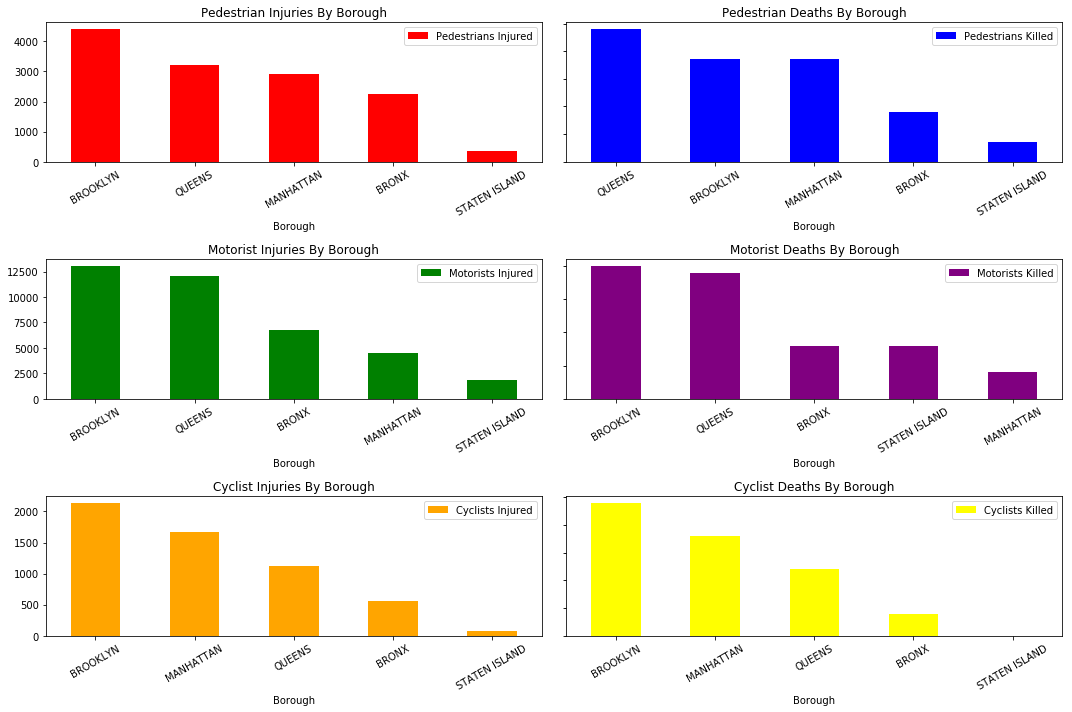

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=2)
pedestinjuriesbyborough[['Pedestrians Injured']].plot(kind='bar', ax=ax[0,0], color=['red'], width=0.5, title ="Pedestrian Injuries By Borough", figsize=(15, 10), legend=True,fontsize=10, rot = 30)
pedestdeathsbyborough[['Pedestrians Killed']].plot(kind='bar', ax=ax[0,1], color=['blue'],width=0.5, title ="Pedestrian Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[0,0],rot = 30 )
motorinjuriesbyborough[['Motorists Injured']].plot(kind='bar', ax=ax[1,0], color=['green'], width=0.5, title ="Motorist Injuries By Borough", figsize=(15, 10), legend=True,fontsize=10, rot = 30)
motordeathsbyborough[['Motorists Killed']].plot(kind='bar', ax=ax[1,1], color=['purple'],width=0.5, title ="Motorist Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[1,0],rot = 30 )
cyclistinjuriesbyborough[['Cyclists Injured']].plot(kind='bar', ax=ax[2,0], color=['orange'],width=0.5, title ="Cyclist Injuries By Borough", figsize=(15, 10), legend=True, fontsize=10,rot = 30 )
cyclistdeathsbyborough[['Cyclists Killed']].plot(kind='bar', ax=ax[2,1], color=['yellow'],width=0.5, title ="Cyclist Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[2,0],rot = 30)

fig.tight_layout()                                         
fig.subplots_adjust(wspace=0.05, hspace=0.7)
plt.show()

 ### 3.1.1 Where Accidents Occur (Totals)
 
 #### Observations and Takeaways
Looking at the numbers from another angle, we see that Brooklyn has the most injuries, but Queens has the most deaths. Furthermore, we see that this difference is largely due to pedestrian deaths, and this is despite the fact that Queens has fewer pedestrian injuries than Brooklyn. Does Queens have a poor hospital system that is either not getting injured pedestrians to treatment quickly enough or is losing them in the hospital themselves. Ultimately, are there more deaths that could have been just injuries?
 
We also see that while Manhattan and The Bronx have about the same amount of injuries, Manhattan has almost twice as many deaths as The Bronx. Again, this difference seems to be due to pedestrian deaths. This might inform us that Amblance ride windows are too long or hospital ER treatment not adequate for pedestrian type injuries.

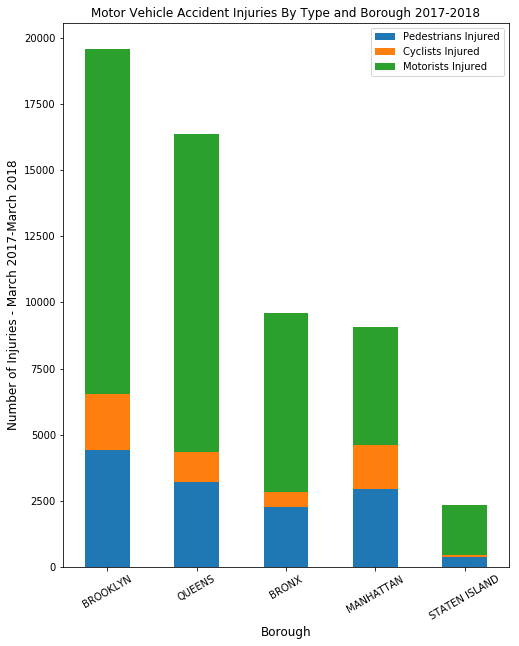

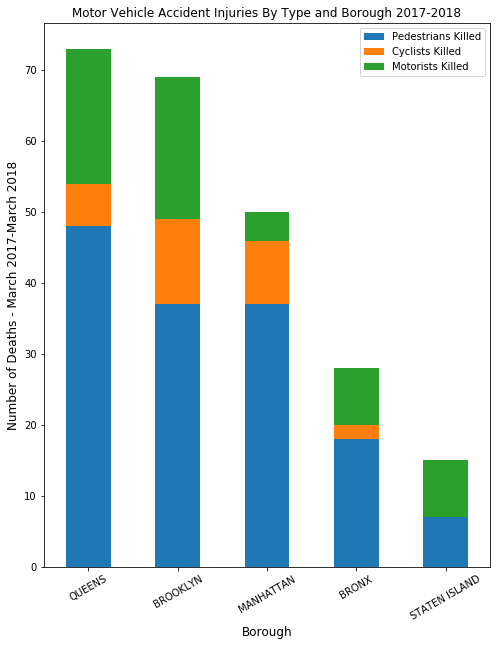

In [9]:
injuriesbyborough = accidentsgrouped.sort_values(by='Total Injured', ascending=False)
deathsbyborough = accidentsgrouped.sort_values(by='Total Killed', ascending=False)

ax = injuriesbyborough[['Pedestrians Injured','Cyclists Injured', 'Motorists Injured']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Injuries - March 2017-March 2018", fontsize=12)

ax = deathsbyborough[['Pedestrians Killed','Cyclists Killed', 'Motorists Killed']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Deaths - March 2017-March 2018", fontsize=12)

plt.show()

Checking the largest accidents we see that there are no major outliers contributing to this discrepency.

In [15]:
accidents = accidents.sort_values(by='Total Killed', ascending=False)
accidentstop10 =accidents.head(10)
print(accidentstop10)

          Borough           Contributing_Factor_1  \
193737  MANHATTAN                 Other Vehicular   
229817        NaN                     Unspecified   
382321        NaN                     Unspecified   
158569     QUEENS                    Unsafe Speed   
86909         NaN                    Unsafe Speed   
192964        NaN                    Unsafe Speed   
173404        NaN  Driver Inattention/Distraction   
296899   BROOKLYN                         Illness   
477901        NaN                     Unspecified   
392070   BROOKLYN                     Unspecified   

                 Contributing_Factor_2       Date  Cyclists Injured  \
193737                     Unspecified 2017-10-31                 1   
229817                     Unspecified 2016-08-31                 0   
382321                     Unspecified 2016-06-19                 0   
158569                     Unspecified 2017-09-18                 0   
86909                      Unspecified 2017-07-16            

 ## 3. Visualizing the Data
 ### 3.2 When Accidents Occur
 Here I look at not where, but when accidents occur.

### 3.2.1 When Accidents Occur (Time of Day)
 
#### Observations and Takeaways
 
##### Injuries
 We see below that injuries for accidents are low in the wee hours of the night. They start rising at around 6 am, with a mini-peak at around 8 am. They fall until 10, at which point they steadily rise again before peaking at around 5pm.
 
 It seems that accidents are low from midnights to 6 am due to few drivers on the road. Accidents spike between 6-8 am as more drivers rush to work, perhaps falling afterwards as roads get too congested for real injuries to take place.
 
 As rushhour ends at 10pm, the rise up to 5pm can be explained by crowded, but not completely congested streets.
 
Interestingly, accidents occur far more at the end of the day than at the beginning. One may posit that this is due to factors such as road-rage after a stressful day at work, fatigure after a long day, or eagerness to arrive home.

In reaction, officials may determine that targeting messaging to drivers may be a good way to alert them to the risks when driving home in the evening. They may also opt to post more traffic cops and general officers throughout the city during these times.

##### Deaths

In direct contrast with injuries, deaths occur the most in the wee hours of the night. This could be due to a number of factors including driver fatigue, drunk driving, and higher car speeds thanks to fewer drivers on the road.

Deaths plummet during the morning rush hour and interestingly rise steadily throughout the day until rush hour is over. This might be because as drivers reach the tail end of their commute home, they are more tired and more eager to get home, and, importantly, no longer in slow-moving traffic.

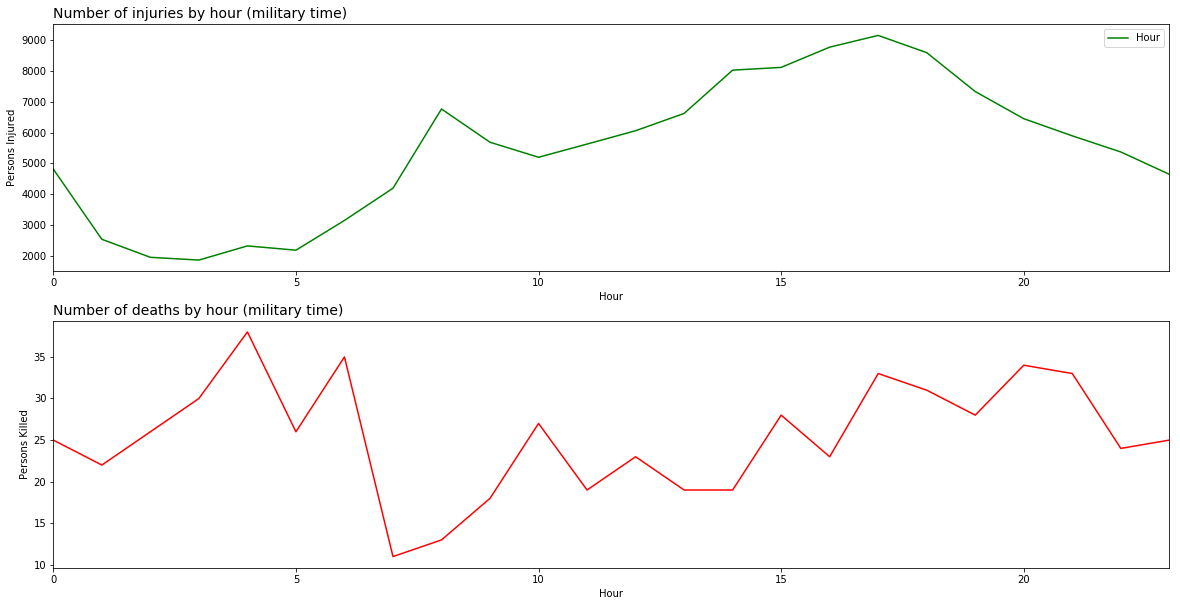

In [17]:
accidentsbyhour = accidents.groupby(['Hour']).sum()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))  
accidentsbyhour['Total Injured'].plot(ax=ax[0], color='green')
ax[0].set_title('Number of injuries by hour (military time)', fontsize=14, loc='left')
ax[0].set_ylabel('Persons Injured')
ax[0].legend(['Hour', 'Persons Injured'])  
accidentsbyhour['Total Killed'].plot(ax=ax[1], color='red')
ax[1].set_title('Number of deaths by hour (military time)', fontsize=14, loc='left')
ax[1].set_ylabel('Persons Killed')
plt.show()

### 3.2.2 When Accidents Occur (Month)
 
#### Observations and Takeaways
While there is not major difference between injuries and deaths between any given month, clearly spring is a time of low accidents, and summer is a period of high accidents.

This may be thanks to the fact that summer the busiest season. Not only are the streets busier with people in general, but perhaps more tourists - in-experienced with the driving, walking, and cycling laws, culture, and direction - are on the streets. 

City officials could be put on "high alert," or government services increased during this period. To balance the budget, this could be met with reduced government services during the low spring months.


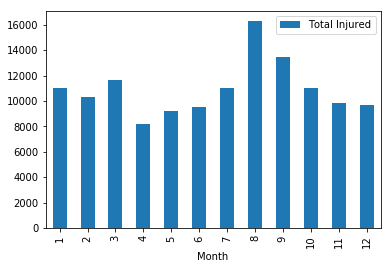

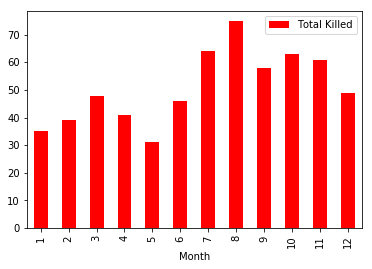

In [19]:
injuriesbymonth = accidents.groupby(['Month']).sum()
injuriesbymonth.plot(y='Total Injured',kind='bar')


deathsbymonth = accidents.groupby(['Month']).sum()
deathsbymonth.plot(y='Total Killed',kind='bar', color='red')
plt.show()

There is no discernable trend specifically in regards to pedestrian, cyclist, and motorist accidents.

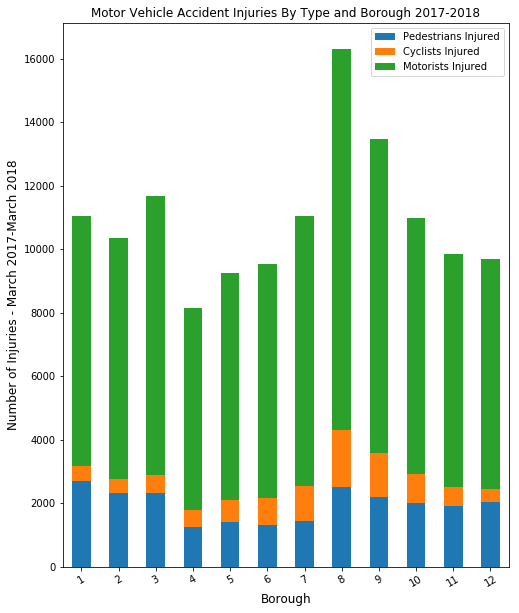

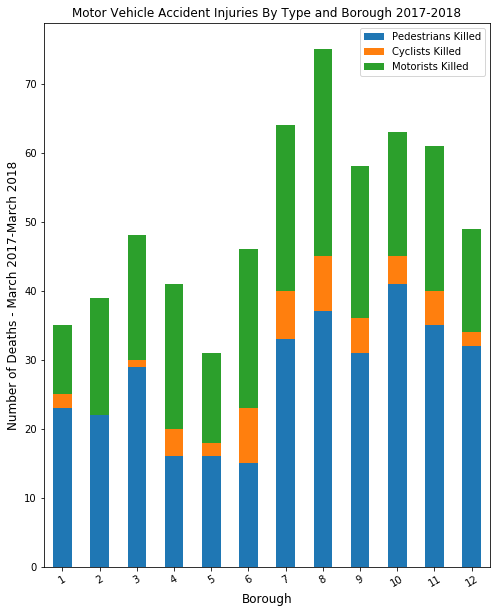

In [24]:
ax = injuriesbymonth[['Pedestrians Injured','Cyclists Injured', 'Motorists Injured']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Injuries - March 2017-March 2018", fontsize=12)

ax = deathsbymonth[['Pedestrians Killed','Cyclists Killed', 'Motorists Killed']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Deaths - March 2017-March 2018", fontsize=12)

plt.show()

Another view shows that injuries and deaths both seem to follow the same trend.

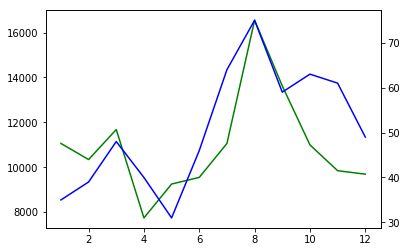

In [10]:
fig, ax1 = plt.subplots()

x = accidentsbymonth.index
y1 = accidentsbymonth['Total Injured']
y2 = accidentsbymonth['Total Killed']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

plt.show()



In [43]:
accidents.dtypes

Borough                          object
Contributing_Factor_1            object
Contributing_Factor_2            object
Date                     datetime64[ns]
Cyclists Injured                  int64
Cyclists Killed                   int64
Motorists Injured                 int64
Motorists Killed                  int64
Pedestrians Injured               int64
Pedestrians Killed                int64
Time                     datetime64[ns]
Vehicle Type 1                   object
Vehicle Type 2                   object
Total Injured                     int64
Total Killed                      int64
Month                             int64
Hour                              int64
dtype: object

 ## 3. Visualizing the Data
 ### 3.3 Why Accidents Occur
 Here I look at not where, not when, but why accidents occur.

#### Observations and Takeaways

The biggest culprit by far for injuries is driver inattention. This is followed by a failure to yield right-of-way and following too closely.

It would be interesting t

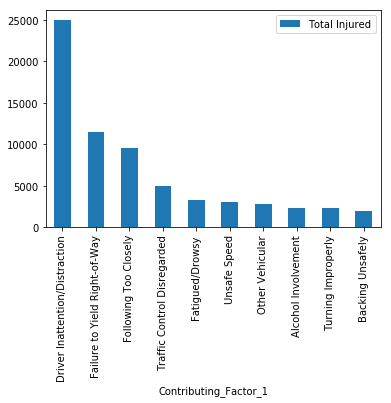

In [39]:
#remove unspecified as an option
accidents = accidents[accidents.Contributing_Factor_1 != 'Unspecified']

#graph injured by cause
contributingfactor = accidents.groupby(['Contributing_Factor_1']).sum()
contributingfactor = contributingfactor.sort_values(by='Total Injured', ascending=False)
contributingfactor =contributingfactor.head(10)
contributingfactor.plot(y='Total Injured',kind='bar')
plt.show()

Note: Look into splicing by Borough.
Also perhaps by time of day?

Also, look at seeing injuries by day of week.
And, time of day injuries by Borough